In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('BankChurners.csv')


In [183]:
data1=pd.DataFrame(data,columns=['Total_Trans_Ct','Total_Trans_Amt','Credit_Limit'])
data1=data1.sort_values(by='Total_Trans_Amt')

In [184]:
data1=data1[0:1000]
data1=pd.get_dummies(data1)
data1

,Total_Trans_Ct,Total_Trans_Amt,Credit_Limit
243,24,510,3387.0
144,10,530,14979.0
1693,15,563,11638.0
1120,23,569,7758.0
1036,14,594,1438.3
...,...,...,...
1362,29,1489,8398.0
971,43,1489,4203.0
529,32,1489,4969.0
957,38,1489,34516.0


In [185]:
for i in data1['Total_Trans_Amt']:
    if int(i)<700:
        data1=data1.replace(i,'1')
    elif int(i)>=700 and int(i)<1000:
        data1=data1.replace(i,'2')
    else:
        data1=data1.replace(i,'3')
df=data1
df.head()
df.index = range(len(df))

In [186]:
x=df.drop(['Total_Trans_Amt'], axis=1)
y=df['Total_Trans_Amt']

In [187]:
x

,Total_Trans_Ct,Credit_Limit
0,24,3387
1,10,14979
2,15,11638
3,23,7758
4,14,1438.3
...,...,...
995,29,8398
996,43,4203
997,32,4969
998,38,34516


In [188]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    3
996    3
997    3
998    3
999    3
Name: Total_Trans_Amt, Length: 1000, dtype: object

In [189]:
feature_names=list(x.columns)
features=x
targets=y
targets_names =y.astype(str)

In [190]:
features

,Total_Trans_Ct,Credit_Limit
0,24,3387
1,10,14979
2,15,11638
3,23,7758
4,14,1438.3
...,...,...
995,29,8398
996,43,4203
997,32,4969
998,38,34516


In [191]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=42)

In [192]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [193]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
clf = DecisionTreeClassifier()

In [200]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy  
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


In [201]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

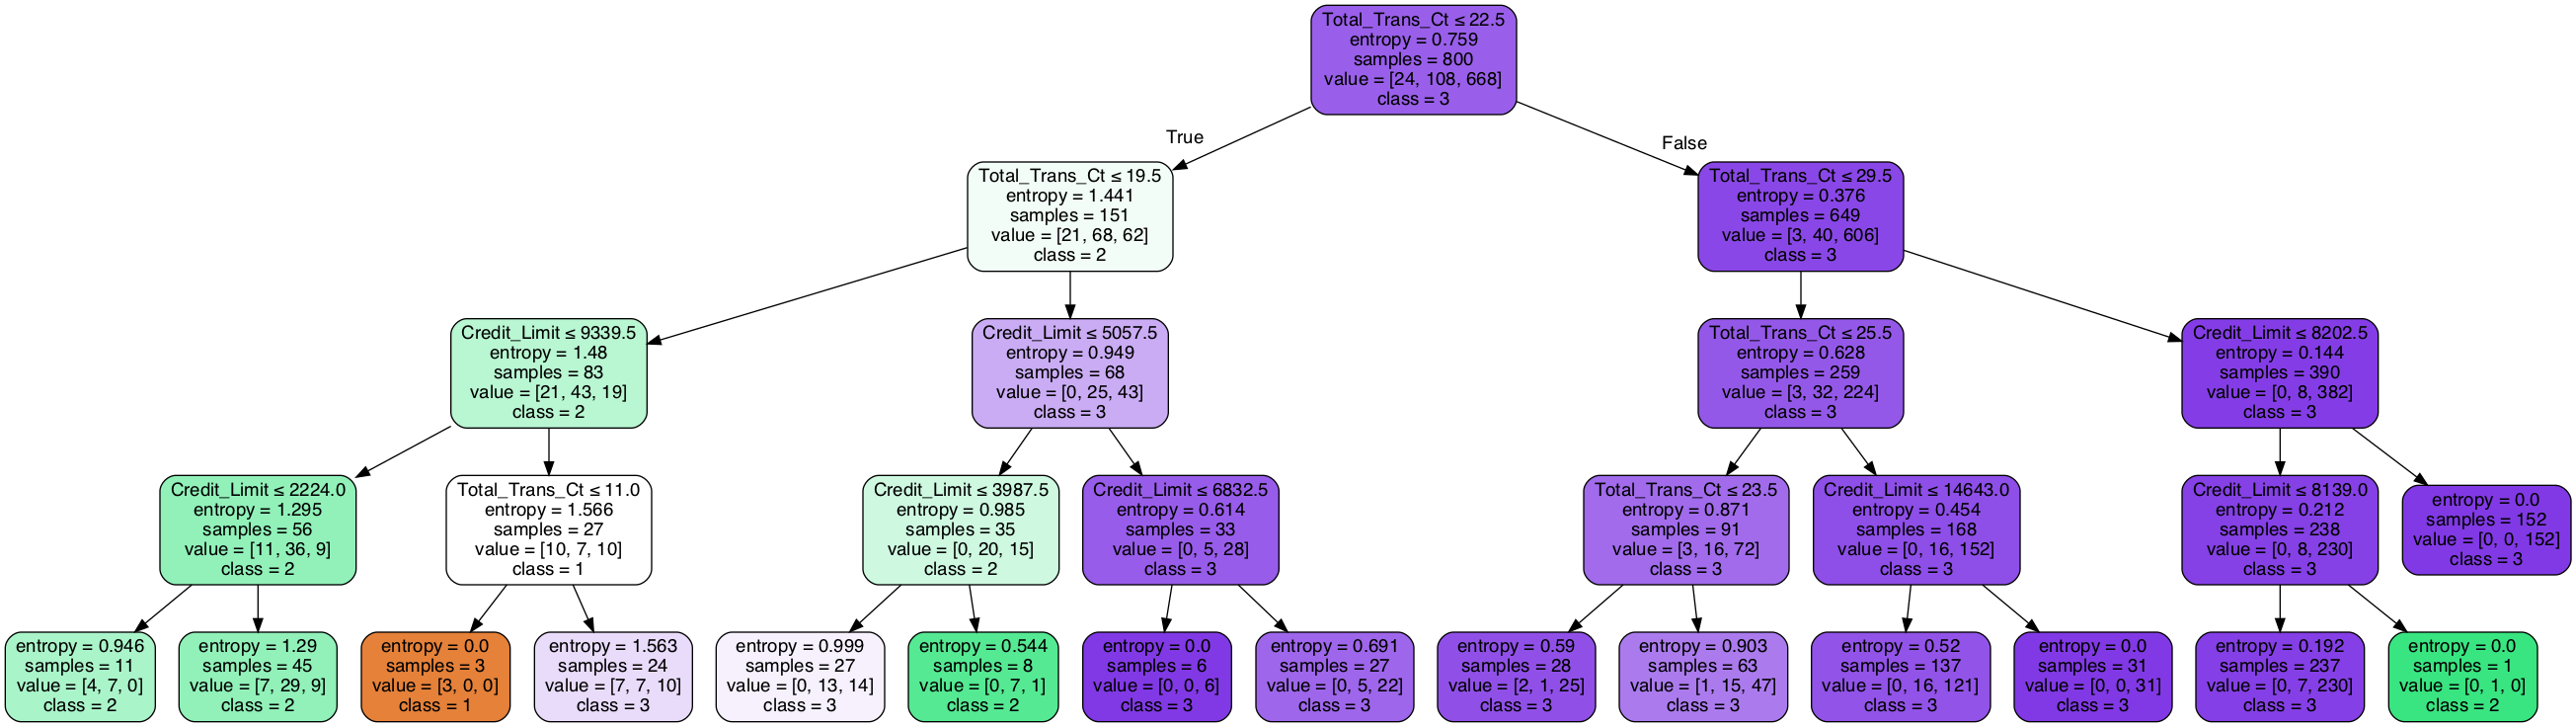

In [202]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ESG.png')
Image(graph.create_png())

In [115]:
y=data['Attrition_Flag']
data['Av_Trans']=data['Total_Trans_Amt']/data['Total_Trans_Ct']#Using the variables Total_Trans_Amt and Total_Trans_Ct we can generate a variable that reproduces the average transaction made by user.
data['Amt_used_per_Limit']=data['Total_Trans_Amt']/data['Credit_Limit']#Using the variables Total_Trans_Amt and Credit_Limit we can generate a new variable that denotes the amount used by customer in relation to their credit limit.

data2=pd.DataFrame(data,columns=['Av_Trans','Amt_used_per_Limit',])

data2.head()

X=data2

In [116]:
y

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [117]:
feature_names=list(X.columns)
features=X
targets=y
targets_names =y.astype(str)

In [118]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [120]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
clf = DecisionTreeClassifier()

In [121]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy  
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.85


In [122]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


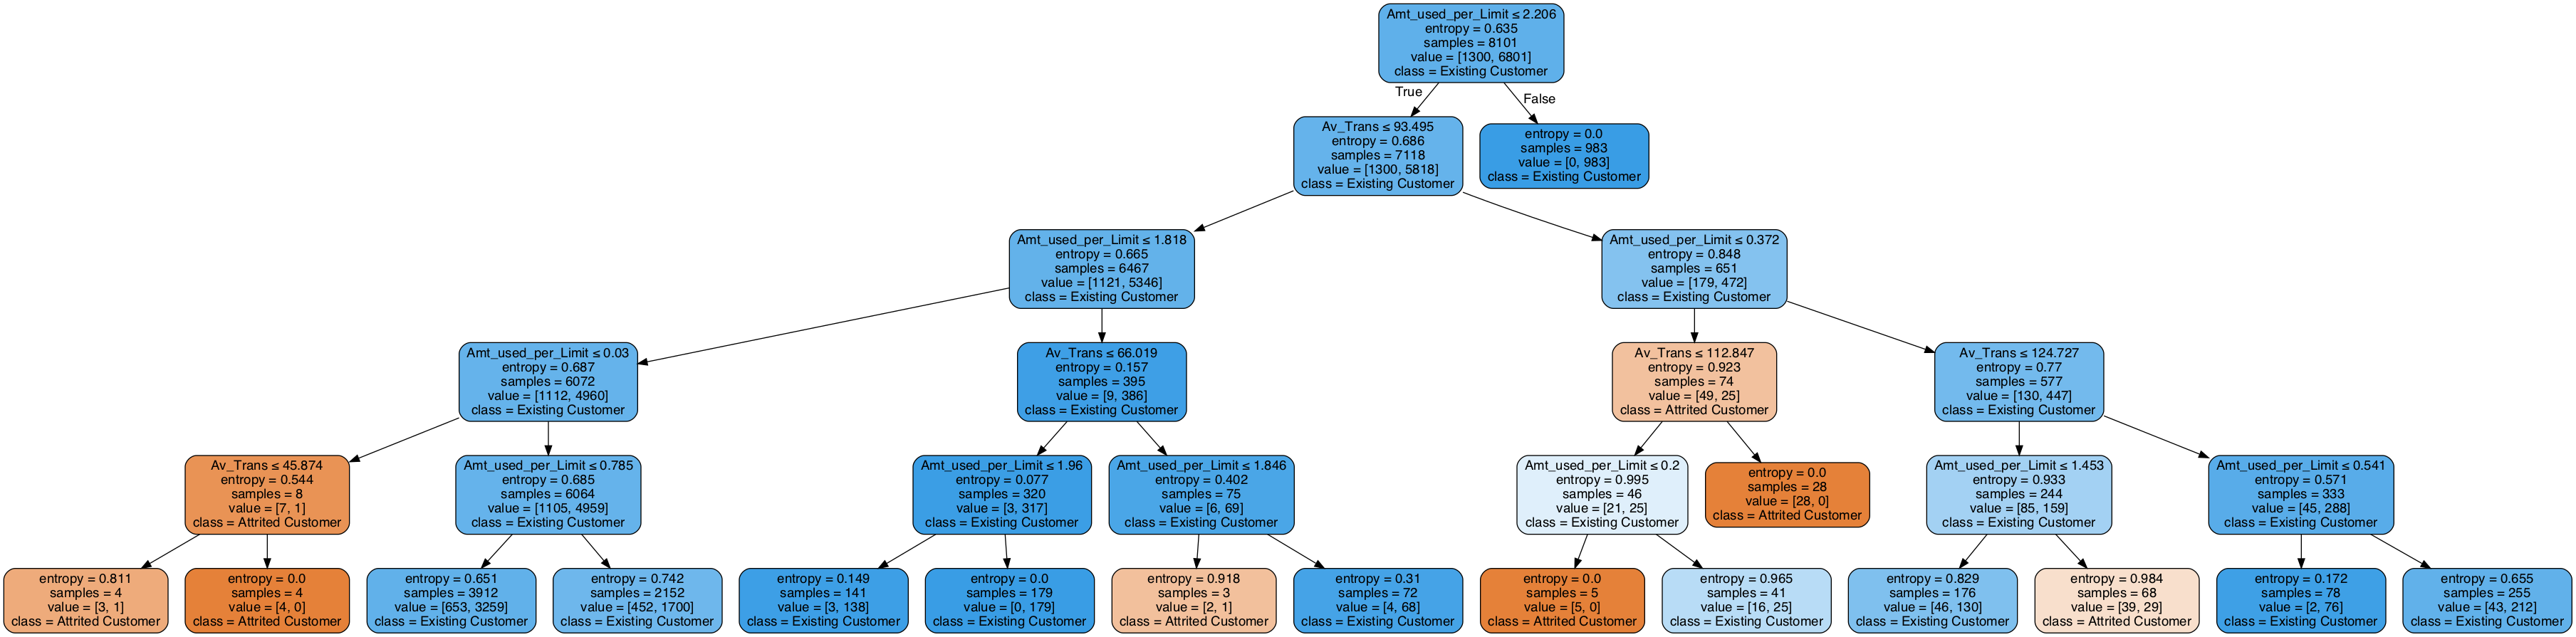

In [123]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X.columns),class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ESG_1.png')
Image(graph.create_png())